In [1]:
import datajoint as dj

In [8]:
import ephys
import experiment
import lab
import matplotlib.pyplot as plt
%matplotlib inline

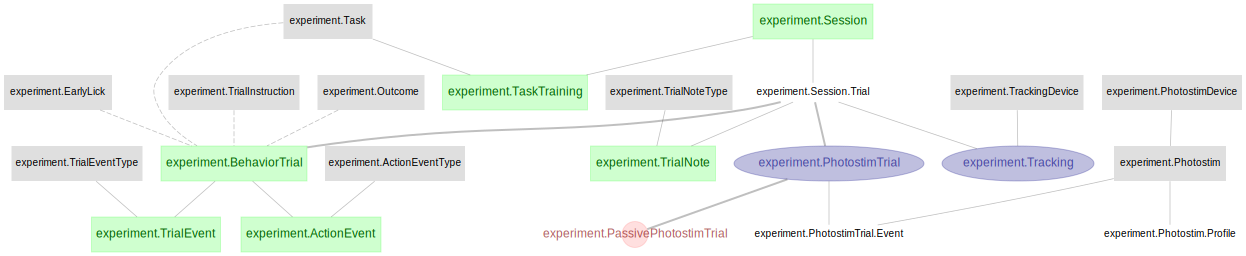

In [3]:
dj.ERD(experiment)

In [14]:
mouse=experiment.Session()
mouse

DataJointError: The table `daveliu_map_experi`.`session` is not defined.

DataJointError: The table `daveliu_map_experi`.`session` is not defined.

In [ ]:
person=ephys.experiment.lab.Person()
#person.insert1(('daveliu', 'Dave Liu'))
person

In [9]:
rig=lab.Rig()
#rig.insert1(('TRig2', 'Training rig 2'))
rig

rig,rig_description
RRig,Recording Rig
TRig1,Training rig 1
TRig2,Training rig 2


In [10]:
rig.drop()

`daveliu_map`.`rig` (3 tuples)


DataJointError: The table `daveliu_map_experi`.`session` is not defined.

In [ ]:
animalWaterRestriction=ephys.experiment.lab.AnimalWaterRestriction()
#animalWaterRestriction.insert1((123456, 'tw5'))
animalWaterRestriction

In [ ]:
dj.ERD(ephys.experiment)

In [ ]:
import ingest
rigDataPath=ingest.RigDataPath()
rigDataFile = ingest.RigDataFile()

In [ ]:
#importedSessionFile
#importedSessionFile.drop()
rigDataFile.populate()

In [ ]:
rigDataPath

In [ ]:
importedSessionFileIngest

In [ ]:
session=ephys.experiment.Session()
session

In [ ]:
trialNote = ephys.experiment.TrialNote()

In [ ]:
import numpy as np

In [ ]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [ ]:
outcome = (behaviorTrial & 'animal = 399752').fetch('outcome', order_by='session')
early_lick = (behaviorTrial & 'animal = 399752').fetch('early_lick', order_by='session')

In [ ]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))
data2 = np.zeros(len(outcome))

In [ ]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1
data2[outcome=='ignore'] = 1

In [ ]:
trial_note = (trialNote & 'animal = 123456').fetch('trial_note', order_by='session')
results = list(map(int, trial_note))
protDiff = np.diff(results)
protChange = np.where(protDiff != 0)

In [ ]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [ ]:
yMA = movingaverage(data,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')


In [ ]:
yMA = movingaverage(data1,200)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')


In [ ]:
yMA = movingaverage(data2,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Ignores')
for i in range(0, len(protChange[0])):
    plt.axvline(protChange[0][i], linewidth=4, color='r')
plt.savefig('')

In [ ]:
len(outcome)